<a href="https://colab.research.google.com/github/destynee/DataAnalysis/blob/main/ExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relationship Between Health Expenditure, and Women's Health Across Countries with Varying GDP in 2021

# Abstract

In this project, we looked at the relationship between women’s health, GDP, and general government health expenditure (GGHE-D) as a percentage of general government expenditure (GGE) of fifteen countries corresponding to low, medium, and high GDP levels. We were interested in this topic because women’s health is usually overlooked when discussing healthcare matters, so we wanted to discover more about how government and the country’s economic status affects women’s health

To do this, we looked at data with information about healthy life expectancy at birth of women across 15 countries representing low, middle, and high GDP levels. We took life expectancy as our metric to measure women’s health, and GDP and GGHE-D as a percentage of GGE to understand the country’s healthcare and economic conditions. The data we used was collected by the World Health Organization and World Bank Group from which we extracted relevant data for the year 2021. We implemented different tests to analyze the data and understand how they relate to each other.

During our analysis, we found that the median age of healthy life expectancy across the fifteen countries ranked according to their GDP level, but that greater GGHE-D as a percentage of GGE improved healthy life expectancy at birth even amongst countries with lower GDP levels. These findings agree with our initial hypothesis.

# Research Question

In 2021, what is the relationship between general government health expenditure and women’s overall health across 5 countries with the highest GDP, 5 countries with middle GDP, and 5 countries with the lowest GDP?

## Background and Prior Work

Over the past decade, the relationship between government health expenditure, healthcare availability, and women's health outcomes has been a focal point of global health research, particularly across countries with varying socioeconomic statuses. Key indicators in this context include GDP, healthy life expectancy at birth, the density of medical doctors per 10,000 population, and domestic general government health expenditure (GGHE-D) as a percentage of general government expenditure (GGE). Out of these, we will consider the GDP level of 15 countries (5 low, 5 middle, 5 high), GGHE-D/GGE %, and healthy life expectancy of women at birth to understand how they relate to each other.

Healthy life expectancy at birth reflects not only the average length of life but also the quality of health during that lifespan, serving as a comprehensive measure of a population's health. GGHE-D as a percentage of GGE indicates the priority given to health within a country's fiscal policy, reflecting the government's commitment to funding healthcare services.

Previous studies have explored the impact of government health expenditures on health outcomes. For instance, research analyzing data from 38 OECD countries between 1996 and 2020 found that a 1% increase in government health expenditures was associated with a 0.21% reduction in infant mortality and a 0.008% increase in life expectancy[1]. This suggests that higher government spending on health can lead to improved health outcomes.

GDP is short for gross domestic product and it is the standard monetary measure of the market values that are rendered by a country. It is widely considered a measurement of economic progress and a country's development. It is theorized that countries with higher GDP are more successful and flourishing.

Existing research underscores the positive impact of increased government health spending and a higher GDP as well as a higher density of medical professionals on health outcomes[2]. However, disparities persist, particularly in women's health and leadership within the healthcare sector, indicating a need for targeted research and policies to address these gaps.

1. Onofrei, M., Vatamanu, A. F., Vintilă, G., & Cigu, E. (2021). Government Health Expenditure and Public Health Outcomes: A Comparative Study among EU Developing Countries. International journal of environmental research and public health, 18(20), 10725. https://doi.org/10.3390/ijerph182010725
2. Anwar et. al. Frontiers in Public Health (2023) Government health expenditures and health outcome nexus: a study on OECD countries https://www.frontiersin.org/journals/public-health/articles/10.3389/fpubh.2023.1123759/full


# Hypothesis


We hypothesize that higher domestic government health expenditure will be positively correlated with increased women’s healthy life expectancy at birth. Additionally, we believe that we will find a more pronounced effect in countries with lower GDP levels, where marginal improvements in spending allocated to healthcare can lead to significant health gains. This expectation is grounded in prior evidence that increased health spending enhances overall health outcomes, especially in resource-limited settings where the relative benefit of additional funding is greater.

# Data

## Data overview

- Dataset #1
  - Dataset Name: GDP (current US$)
  - Link to the dataset: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
  - Number of observations: 271
  - Number of variables: 67
- Dataset #2
  - Dataset Name: World Health Statistics 2024
  - Link to the dataset: https://data.who.int/
  - Number of observations: 10504
  - Number of variables: 9

The World Health Statistics 2024 dataset provides key health indicators such as life expectancy, mortality rates, disease prevalence, and health financing metrics, which serve as proxies for overall health, disease burden, and the effectiveness of health systems. The data includes quantitative metrics (e.g., life expectancy, mortality rates) and categorical data (e.g., health system performance, disease types). Preprocessing this data involves handling missing values, normalizing numerical variables, encoding categorical variables, detecting outliers, and validating data accuracy to ensure consistency and reliability for analysis. Proper wrangling and cleaning of this data are essential to derive actionable insights for global health policy.

GDP (current US$) represents the total market value of all final goods and services produced within a country's borders, measured in current U.S. dollars. The dataset includes variables like years and country, which are essential for understanding economic trends over time. Preprocessing the dataset involves handling missing or inconsistent data, removing extra data (that are not countries), and possibly checking for inconsistencies.

To combine GDP (current US$) data with other health-related datasets, we will first ensure that the datasets have a common identifier, such as country and year, to align the records accurately. We will join the datasets on these identifiers using a merge or join operation. Once combined, we will check for consistency in country names, handle any discrepancies (e.g., different naming conventions), and align the year to ensure a smooth comparison of economic and health metrics. After merging, we will verify that both datasets are in the same categories (e.g., country-level, year-level) and ensure no data is lost or mismatched during the process. Finally, we will clean and preprocess the merged dataset by handling missing values and addressing any anomalies or outliers before performing an analysis.

## Setup

In [ ]:
# Uncomment to install `geopandas` and `geodatasets` package. Only need to do once.
#!pip install geopandas
#!pip install geodatasets

# Import seaborn and apply its plotting styles
import seaborn as sns

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

# import pandas & numpy library
import pandas as pd
import geopandas as gpd
import geodatasets
import numpy as np

# Statmodels & patsy
import patsy
import scipy.stats as stats
from sklearn.cluster import KMeans
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Remove red depreication warning outputs.
import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Dataset #1 (GDP (current US))

In [ ]:
# GDP data
gdp = pd.read_csv('gdp_countries.csv')

# Data Wrangling & Cleaning

The dataframe is reshaped, non-country values are extracted and stored in variable not_countries.

In [ ]:
# Change dataframe columns to be the headers and get ride of first few unnecessary rows
gdp.columns = gdp.iloc[3]
gdp = gdp[4:]

# Resets the index for gdp
gdp = gdp.reset_index(drop=True)
gdp

# Turns the columns in gdp to become strings
gdp.columns = gdp.columns.astype(str)
gdp

not_countries = ['Early-demographic dividend','Arab World', 'Central Europe and the Baltics','East Asia & Pacific (excluding high income)', 'Euro area', 'Europe & Central Asia (excluding high income)','European Union','Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)','Latin America & Caribbean (excluding high income)','Least developed countries: UN classification','Middle East & North Africa (excluding high income)','OECD members','Sub-Saharan Africa (excluding high income)','World', 'East Asia & Pacific',
                 'Europe & Central Asia', 'Macao SAR, China','Latin America & Caribbean','North America', 'Middle East & North Africa', 'South Asia', 'Sub-Saharan Africa','Low income', 'Lower middle income', 'Middle income', 'High income', 'Upper middle income','IBRD only','IDA blend','IDA only','Late-demographic dividend','Low & middle income','IDA & IBRD total','Post-demographic dividend','East Asia & Pacific (IDA & IBRD countries)','	Early-demographic dividend','Latin America & the Caribbean (IDA & IBRD countries)','Europe & Central Asia (IDA & IBRD countries)','South Asia (IDA & IBRD)','IDA total','Sub-Saharan Africa (IDA & IBRD countries)']
gdp = gdp[~gdp.isin(not_countries).any(axis=1)]

The dataframe `gdp_21` is structured with selected columns and missing values eliminated.

In [ ]:
#GDP for 2021 only
gdp_21 = gdp[['Country Name' , 'Country Code','2021.0']]

#Drop any missing values
gdp_21 = gdp_21.dropna()
gdp_21

3,Country Name,Country Code,2021.0
0,Aruba,ABW,2.929447e+09
1,Africa Eastern and Southern,AFE,1.085750e+12
2,Afghanistan,AFG,1.426000e+10
3,Africa Western and Central,AFW,8.493120e+11
4,Angola,AGO,6.650513e+10
...,...,...,...
260,Samoa,WSM,8.439236e+08
261,Kosovo,XKX,9.413404e+09
263,South Africa,ZAF,4.208870e+11
264,Zambia,ZMB,2.209642e+10


## Dataset #2 (World Health Statistics 2024)

In [ ]:
# World health organization data
who = pd.read_excel('web_download.xlsx')

Essential data for the analysis is extracted and stored in the DataFrame `who1`.

In [ ]:
# List of the variables we want
variables = ['Domestic general government health expenditure (GGHE-D) as percentage of general government expenditure (GGE) (%)','Life expectancy at birth (years)']

# New dataset with the variables that we want
who1 = who[who.isin(variables).any(axis=1)]
who1 = who1[['IND_NAME','DIM_GEO_NAME','DIM_GEO_CODE','DIM_1_CODE','VALUE_NUMERIC','VALUE_STRING']]

# Removing males and both sex data
who1 = who1[~who1['DIM_1_CODE'].isin(['SEX_MLE', 'SEX_BTSX'])]

#Making sure there is data for both variables that we want
who1 = who1.groupby('DIM_GEO_NAME').filter(lambda x: len(x) == 2)
who1 = who1.reset_index(drop=True)
who1

,IND_NAME,DIM_GEO_NAME,DIM_GEO_CODE,DIM_1_CODE,VALUE_NUMERIC,VALUE_STRING
0,Domestic general government health expenditure...,Afghanistan,AFG,NaN,4.050000,4.1
1,Life expectancy at birth (years),Afghanistan,AFG,SEX_FMLE,60.986038,61.0
2,Domestic general government health expenditure...,African Region,AFR,NaN,7.250000,7.3
3,Life expectancy at birth (years),African Region,AFR,SEX_FMLE,65.371376,65.4
4,Domestic general government health expenditure...,Albania,ALB,NaN,9.140000,9.1
...,...,...,...,...,...,...
363,Life expectancy at birth (years),Western Pacific Region,WPR,SEX_FMLE,80.513786,80.5
364,Domestic general government health expenditure...,Zambia,ZMB,NaN,9.250000,9.3
365,Life expectancy at birth (years),Zambia,ZMB,SEX_FMLE,63.109314,63.1
366,Domestic general government health expenditure...,Zimbabwe,ZWE,NaN,5.210000,5.2


##Merge

Updates to the data are checked ensuring there exists countries containing the same name.

In [ ]:
# Looks at the countries in who1 to make sure we have the same countries in both data sets for easy merging
countries_left = who1['DIM_GEO_CODE'].tolist()
gdp_21 = gdp_21[gdp_21.isin(countries_left).any(axis=1)]
gdp_21

3,Country Name,Country Code,2021.0
2,Afghanistan,AFG,1.426000e+10
4,Angola,AGO,6.650513e+10
5,Albania,ALB,1.803201e+10
8,United Arab Emirates,ARE,4.151790e+11
9,Argentina,ARG,4.865640e+11
...,...,...,...
258,Vanuatu,VUT,9.503940e+08
260,Samoa,WSM,8.439236e+08
263,South Africa,ZAF,4.208870e+11
264,Zambia,ZMB,2.209642e+10


Data from `gdp_21` is grouped by economic level and countries of interest are extracted from who1.

In [ ]:
# Find top 5 GDP
top_5_gdp = gdp_21.sort_values(by='2021.0', ascending=False)
top_5_gdp = top_5_gdp.head()
top_5_gdp['status'] = 'top'


# Find middle 5 GDP
middle_5_gdp = gdp_21.sort_values(by='2021.0', ascending=False)
middle = len(middle_5_gdp)//2
middle_5_gdp = middle_5_gdp[middle-3:middle+2]
middle_5_gdp = middle_5_gdp.head()
middle_5_gdp['status'] = 'middle'

# Find lowest 5 GDP
lowest_5_gdp = gdp_21.sort_values(by='2021.0', ascending=True)
lowest_5_gdp = lowest_5_gdp.head()
lowest_5_gdp['status'] = 'lowest'

# Create a new dataframe of the countries of interest
countries = pd.merge(top_5_gdp, lowest_5_gdp, how="outer")
countries = pd.merge(countries, middle_5_gdp, how="outer")

# Create a list of the countries of interest names
countries_code = countries['Country Code'].tolist()

# Countries of interest
countries

3,Country Name,Country Code,2021.0,status
0,Bahrain,BHR,4.084021e+10,middle
1,Cameroon,CMR,4.501194e+10,middle
2,China,CHN,1.782050e+13,top
3,Germany,DEU,4.348300e+12,top
4,India,IND,3.167270e+12,top
5,Japan,JPN,5.034620e+12,top
6,Jordan,JOR,4.629610e+10,middle
7,Kiribati,KIR,2.893393e+08,lowest
8,"Micronesia, Fed. Sts.",FSM,3.900000e+08,lowest
9,Samoa,WSM,8.439236e+08,lowest


In [ ]:
#Extract countries of interest from WHO data
who1 = who1[who1.isin(countries_code).any(axis=1)]
who1.reset_index(drop=True)


who1 = who1[['IND_NAME','DIM_GEO_NAME','DIM_GEO_CODE','VALUE_NUMERIC']]
who1

,IND_NAME,DIM_GEO_NAME,DIM_GEO_CODE,VALUE_NUMERIC
24,Domestic general government health expenditure...,Bahrain,BHR,8.690000
25,Life expectancy at birth (years),Bahrain,BHR,75.094658
60,Domestic general government health expenditure...,Cameroon,CMR,2.860000
61,Life expectancy at birth (years),Cameroon,CMR,63.724407
70,Domestic general government health expenditure...,China,CHN,8.910000
71,Life expectancy at birth (years),China,CHN,80.523247
130,Domestic general government health expenditure...,Germany,DEU,19.950001
131,Life expectancy at birth (years),Germany,DEU,82.859177
154,Domestic general government health expenditure...,India,IND,3.690000
155,Life expectancy at birth (years),India,IND,69.019615


In [ ]:
# Turns Domestic general government health expenditure (GGHE-D) as percentage of general government expenditure (GGE) (%) and Healthy life expectancy at birth (years) into columns
who2 = who1.pivot(index='DIM_GEO_NAME', columns='IND_NAME', values='VALUE_NUMERIC')
who2 = who2.reset_index()

# Adds Country Codes
who2['Country Code'] = countries_code

# Reordering columns and renaming columns
who2 = who2[['DIM_GEO_NAME', 'Country Code','Domestic general government health expenditure (GGHE-D) as percentage of general government expenditure (GGE) (%)','Life expectancy at birth (years)']]
who2.columns = ['Country Name', 'Country Code', 'Domestic general government health expenditure (%)', 'Healthy life expectancy at birth (years)']

# Merge who2 and countries
c_data = pd.merge(who2, countries, on = 'Country Code', how="inner")

# Gets rid of extra country name
c_data = c_data.drop(columns=['Country Name_y'])
c_data.columns = ['Country Name', 'Country Code', 'Domestic general government health expenditure (%)', 'Life expectancy at birth (years)','GDP 2021','Status']
c_data

,Country Name,Country Code,Domestic general government health expenditure (%),Life expectancy at birth (years),GDP 2021,Status
0,Bahrain,BHR,8.690000,75.094658,4.084021e+10,middle
1,Cameroon,CMR,2.860000,63.724407,4.501194e+10,middle
2,China,CHN,8.910000,80.523247,1.782050e+13,top
3,Germany,DEU,19.950001,82.859177,4.348300e+12,top
4,India,IND,3.690000,69.019615,3.167270e+12,top
5,Japan,JPN,21.450001,87.158035,5.034620e+12,top
6,Jordan,JOR,7.910000,76.980499,4.629610e+10,middle
7,Kiribati,KIR,9.970000,63.959000,2.893393e+08,lowest
8,Micronesia (Federated States of),FSM,2.600000,68.658119,3.900000e+08,lowest
9,Samoa,WSM,14.750000,71.580856,8.439236e+08,lowest


# Results


## Exploratory Data Analysis & Data Visualization

In this section, we will be looking at plots of our data to see if there is a relationship between GDP and women's life expectancy in 15 countries of various GDP statuses.

In [ ]:
#shows basic descriptive statistics
c_data.describe()

,Domestic general government health expenditure (%),Life expectancy at birth (years),GDP 2021
count,15.000000,15.000000,1.500000e+01
mean,10.916667,74.409783,3.618895e+12
std,6.253673,6.585887,7.251703e+12
min,2.600000,63.724407,2.893393e+08
25%,7.625000,70.300236,6.841630e+08
50%,8.910000,75.094658,4.629610e+10
75%,13.945000,78.063965,3.757785e+12
max,21.450001,87.158035,2.368120e+13


The descriptive statistics provide a brief overview of the data. From this, we can see that the average age found is ~74 years  old, a minimum age of ~64, and a maximum of ~87 years old. These values make sense as those are realistic age numbers.
Additionally, we see that the minimum GGHE-D % is 2.6%, an average of 10.91%, and a maximum of 21.45%. This tells us that governments spent less than 1/4 of their funds on health care in 2021.
Lastly, GDP values make sense as they usually represent large amounts of money even when countries are less affluent.

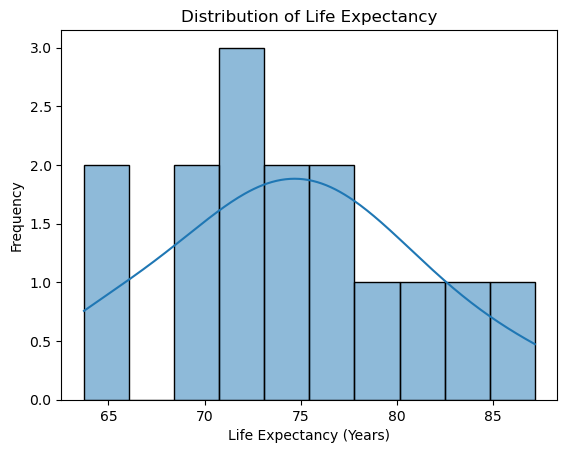

In [ ]:
# Plot histogram of life expectancy.
sns.histplot(c_data['Life expectancy at birth (years)'], bins=10, kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Frequency')
plt.show()

The histogram above is a visualization showing the distribution of life expectancy across 15 countries. Where the *x*-axis represents life expectancy in years, and the *y*-axis indicates the frequency of countries within each bin. The kernel density estimation line shows the density of different life expectancy values.  
The majority of the countries we analyze have a life expectancy within the range of 65-85 years. Life expectancy below 65 years may indicate regions that have lower healthcare access and living conditions. The result of the distribution is slightly right-skewed, suggesting that most countries tend to have average to low life expectancy.

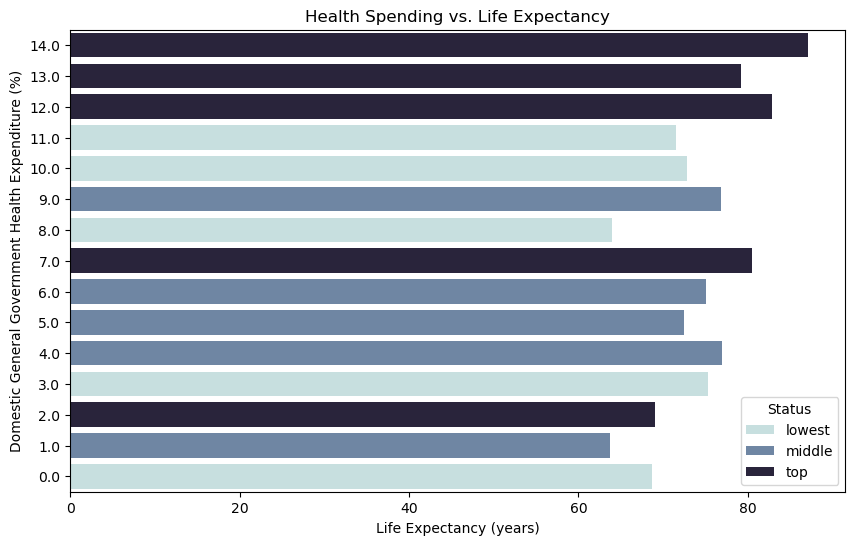

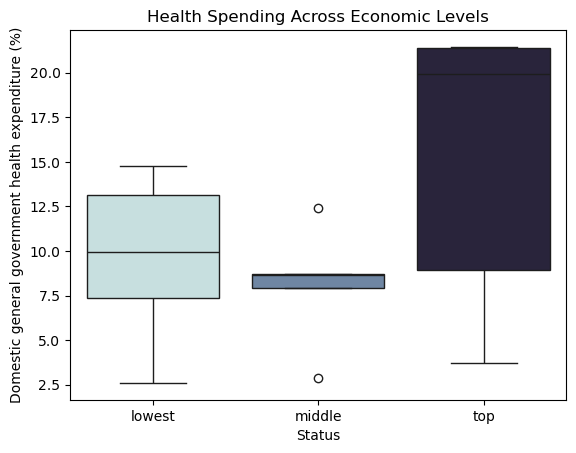

In [ ]:
# Bar Plot: Health Spending vs. Life Expectancy.
plt.figure(figsize=(10, 6))
sns.barplot(data=c_data, x='Life expectancy at birth (years)', y='Domestic general government health expenditure (%)', hue='Status',  hue_order=['lowest', 'middle', 'top'], orient='y', palette='ch:start=.2,rot=-.3')

plt.title('Health Spending vs. Life Expectancy')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Domestic General Government Health Expenditure (%)')
# y-axis to show rounded values.
plt.yticks(ticks=plt.yticks()[0], labels=[f'{y:.1f}' for y in plt.yticks()[0]])
# Invert y-axis values
ax = plt.gca()
ax.invert_yaxis()
plt.show()

# Plot health spending by 'Status'.
sns.boxplot(data=c_data, x='Status', y='Domestic general government health expenditure (%)', order=['lowest', 'middle', 'top'], palette='ch:start=.2,rot=-.3')
plt.title('Health Spending Across Economic Levels')
plt.show()

Graph: *Health Spending vs. Life Expectancy*  
The first graph examines how domestic general government health expenditure (% GDP), which we refer to as "health spending" relates to life expectancy. Visualizing this data allows us to see that higher health spending doesn't always relate to a higher life expectancy. Some countries with middle GDP have a high life expectancy and low health expenditure.  
What's also significant is the variance seen in health spending between top GDP countries, with some countries spending more than others, but not achieving higher life expectancy.  


Graph: *Health Spending Across Economic Levels*  
A box plot helps identify patterns in healthcare spending across economic levels. Countries with high GDP status vary greatly in the percentage they spend on government health expenditures compared to any other category. Moreover, it is noticeable to see that there are outliers on both extremes of the middle countries, which indicates that they spend either more or less than what other middle countries do, however, we may not have added enough data to confirm.


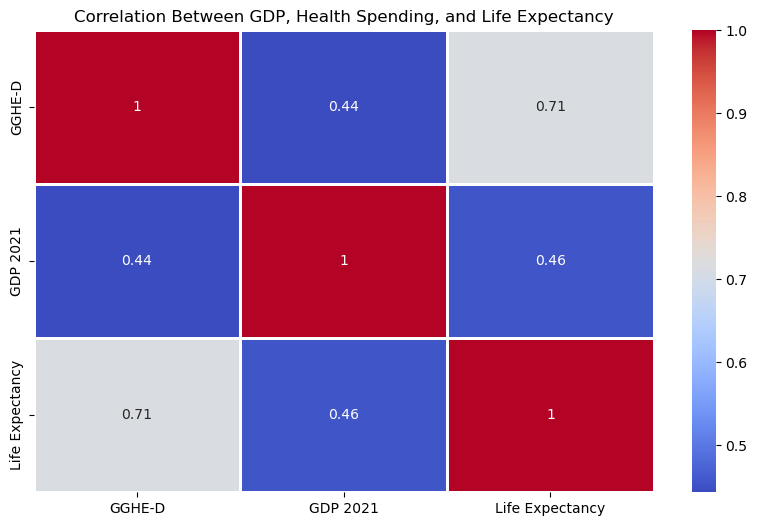

In [ ]:
# Extract columns for correlation relationship.
corr_columns = ['Domestic general government health expenditure (%)', 'GDP 2021', 'Life expectancy at birth (years)']

#Rename labels
new_xlabels = ['GGHE-D', 'GDP 2021', 'Life Expectancy']
new_ylabels = ['GGHE-D', 'GDP 2021', 'Life Expectancy']

# Correlation matrix.
plt.figure(figsize=(10,6))
correlation = c_data[corr_columns].corr()
sns.heatmap(correlation, annot=True, xticklabels=new_xlabels, yticklabels=new_ylabels, cmap='coolwarm', linewidths=0.8)
plt.title('Correlation Between GDP, Health Spending, and Life Expectancy')
plt.show()


We generate a matrix to observe the correlation coefficient between GDP, health spending, and life expectancy. The output shown in the heatmap indicates there is a strong positive relationship between the domestic general government expenditure, with a correlation coefficient of 0.71.

Additionally, GDP and Life expectancy at birth relationship has a correlation coefficent of 0.46 indicating a moderate positive relationship. The correlation between GDP and health spending, given as 0.44, suggests wealthier countries allocate more of their spending towards healthcare.

However, confounding variables, such as the efficiency of healthcare, cultural factors, economic inequality, and similar could be influencing these relationships. The correlations provided aren't enough to imply causation.


<!--- If GDP & Life Expectancy have strong correlation (r > 0.7): Richer countries tend to have healthier populations.
If Health Expenditure & Life Expectancy show  weak correlation (r < 0.3): Spending alone isn't sufficient to improve health. --->

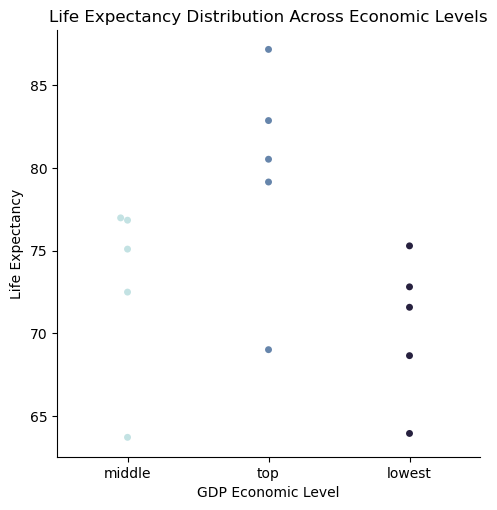

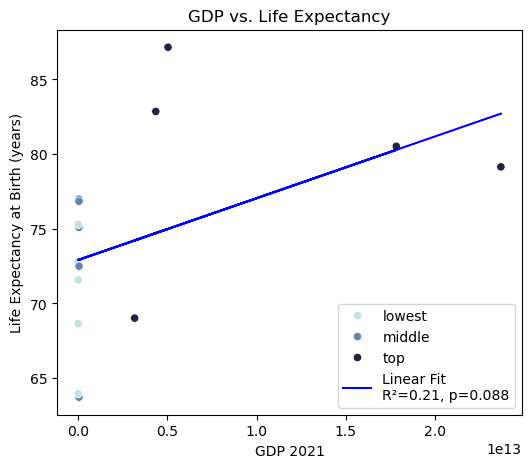

In [ ]:
# Plot life expectancy by 'Status'.
# Categorical Scatter Plot: Life expectancy by 'Status'.
sns.catplot(data=c_data, x='Status', y='Life expectancy at birth (years)', kind='swarm',  palette='ch:start=.2,rot=-.3');
plt.title('Life Expectancy Distribution Across Economic Levels')
plt.xlabel('GDP Economic Level')
plt.ylabel('Life Expectancy')
plt.show()

# Scatter plot with regression: GDP vs. Life Expectancy.
plt.figure(figsize=(6,5))
sns.scatterplot(data=c_data, x='GDP 2021', y='Life expectancy at birth (years)', hue='Status', hue_order=['lowest', 'middle', 'top'],  palette='ch:start=.2,rot=-.3')
# Log scale to help visualize GDP differences.
#plt.xscale('log')

# Add regression data.
slope, intercept, r_value, p_value, stand_err = stats.linregress(c_data['GDP 2021'], c_data['Life expectancy at birth (years)'])
line = slope * c_data['GDP 2021'] + intercept
plt.plot(c_data['GDP 2021'], line, color='blue', label=f'Linear Fit\nR²={r_value**2:.2f}, p={p_value:.3f}')
plt.title('GDP vs. Life Expectancy')
plt.xlabel('GDP 2021')
plt.ylabel('Life Expectancy at Birth (years)')
plt.legend()
plt.show()


The first graph visualizes the distribution of Life expectancy across GDP status where each point represents a country and placement along the *y*-axis corresponds to its life expectancy. As shown above, the top countries have an average life expectancy of around 80 years old. Furthermore, the lowest countries have the largest range of life expectancy. Outliers are interesting in the graph as it depicts that both the middle and top countries have an outlier that is comparable to the lowest countries' life expectancy. This is unexpected as we have observed that there was a positive relationship between GDP and life expectancy, therefore these countries must be having other issues that are not within the scope of our project and therefore we are unable to predict these as well as we would like.

The second graph evaluates the relationship between GDP and life expectancy. This is done by fitting a regression line (*R-squared = 0.21* and *p=0.088*) to determine any statistical relationships. What is observed is the large gap between high GDP countries and countries in the middle GDP category. As well as middle GDP varies widely in life expectancy. Furthermore, when comparing with life expectancy there is a positive relationship, we can see that there is an outlier with one of the top countries having an extremely low life expectancy comparable to those with middle or lowest GDP status.

Despite a positive slope regression line, the spread of data points shows large variation, this reduces confidence in GDP alone as a predictor of life expectancy. The weak R-squared and p-value may be due to other factors influencing life expectancy that require investigating.

### Geospatial Analysis: Healthcare Spending & Life Expectancy

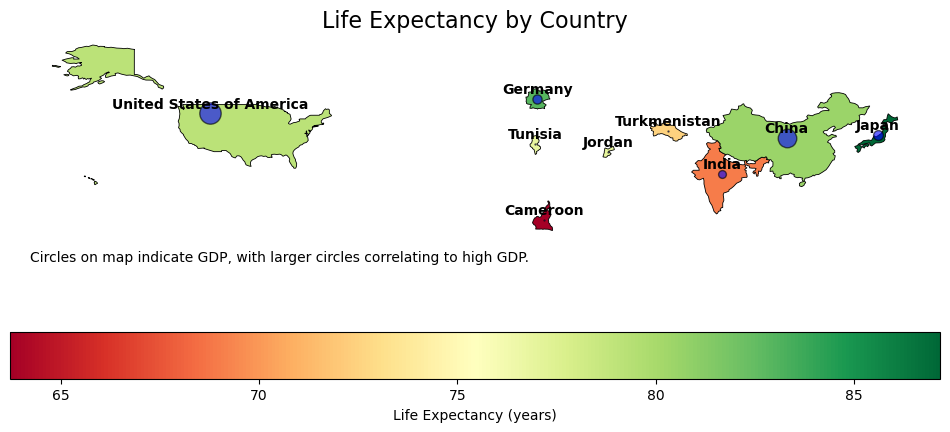

In [ ]:
# Assign file path to geospatial files to variable `geoshape_file`.
geoshape_file = 'geospatial/ne_110m_admin_0_countries.shp'

# Assign GDP levels to colors.
gdp_color = {'top': 'green', 'middle': 'blue', 'lowest': 'red'}

# Initialize world map DataFrame.
map_df = gpd.read_file(geoshape_file)

# Merge `map` and 'Country Code' data.
map_df = map_df.merge(c_data, how='left', left_on='ISO_A3', right_on='Country Code')

# Remove missing values in 'Status'.
map_df = map_df.dropna(subset=['Status'])

# Filter out repeating countries.
countries = c_data['Country Code'].unique()
map_df = map_df[map_df['ISO_A3'].isin(countries)]

# Visualize outlier data, i.e.: high spending and lower life expectancy (bottom `25%` life expectancy).
low_life = map_df['Life expectancy at birth (years)'].quantile(0.25)
outlier = map_df[(map_df['Domestic general government health expenditure (%)'] > 10) &
                  (map_df['Life expectancy at birth (years)'] < low_life)]

# Assign figure and axis.
fig, ax = plt.subplots(figsize=(12,8))

# Plot healthcare spending vs. life expectancy.
map_df.plot(column='Life expectancy at birth (years)', cmap='RdYlGn', linewidth=0.6, ax=ax, edgecolor='black',
            legend=True, legend_kwds={'label': 'Life Expectancy (years)', 'orientation': 'horizontal'})

# Plot 'GDP 2021' as bubbles overlay on `map_df`.
for country, row in map_df.iterrows():
    plt.scatter(row.geometry.centroid.x, row.geometry.centroid.y, s=row['GDP 2021']/1e11, color='red'
                if row['Country Code'] in outlier['Country Code'].values else 'blue',
                alpha=0.6, edgecolors='black')

    # Create labels based on 'Country Name'.
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y + 2, row['Country Name'], fontsize=10, fontweight='bold', ha='center', color='black')

# Remove graphing axis.
plt.axis('off')
plt.grid(False)

# Aspect ratio on x- and y- axis to be equal.
ax.set_aspect('equal')

plt.text(x=-180, y=-10, s='Circles on map indicate GDP, with larger circles correlating to high GDP.', fontsize=10, color='black')
plt.title('Life Expectancy by Country', fontsize=16)
plt.show()

### Life Expectancy & GDP Representation

The map generated above shows life expectancy by country with GDP represented as circles varying in size. Larger circles are correlated with high GDP countries, and the opposite applies to circles decreasing in size.  

The color gradient bar represents life expectancy, where the left-most end (red) is 65 years old and the farthest right (green) is 85 years. An interesting relationship can be seen between green shaded countries associated with smaller circles, indicating some countries reach high values despite low GDP levels.

## Data Models & Analysis

In this section we will be looking into the relationship and regrssion between our life expectancy and GDP groups.

### Hypothesis Testing: Analysis of Variance (ANOVA)

Performing an analysis of variance test to determine if life expectancy differences across GDP economic levels produce a statistically significant result. We define our null hypothesis as having no significant difference in life expectancy among high, middle, and low GDP countries. A p-value less than 0.05 may indicate that GDP potentially impacts life expectancy and therefore rejects the null hypothesis. With a value greater than 0.05, we fail to reject our null hypothesis since there is no significant difference.



In [ ]:
# Group by GDP category.
high_gdp = c_data[c_data['Status'] == 'top']['Life expectancy at birth (years)']
mid_gdp = c_data[c_data['Status'] == 'middle']['Life expectancy at birth (years)']
low_gdp = c_data[c_data['Status'] == 'lowest']['Life expectancy at birth (years)']

# Initiate variance analysis.
anova_result = stats.f_oneway(high_gdp, mid_gdp, low_gdp)
print(f'ANOVA Test Statistic: {anova_result.statistic:.3f}, p-value: {anova_result.pvalue:.3f}')

ANOVA Test Statistic: 3.650, p-value: 0.058


The result from the ANOVA test gives a p-value above 0.05, meaning the null hypothesis cannot be rejected. This suggests there is no statistically significant difference in life expectancy between top, middle, and low GDP categories.

### Pearson Correlation: Health Expenditure vs. Life Expectancy  

`corr_coef`: Close to +1 or -1 indicates a strong relationship.  
`corr_coef`: Close to 0 indicates a weak relationship or no relationship.  
`p-value < 0.05`: Relationship statistically significant.

In [ ]:
# Pearson correlation test.
corr_coef, p_value = stats.pearsonr(c_data['Domestic general government health expenditure (%)'], c_data['Life expectancy at birth (years)'])

print(f'Correlation Coefficient: {corr_coef:.3f}, p-value: {p_value:.3f}')

Correlation Coefficient: 0.714, p-value: 0.003


With a correlation coefficient of 0.714, there is a strong positive relationship between health expenditure and life expectancy. Since our p-value is less than 0.05, the relationship is statistically significant.

However, causation is not factored into the correlation. Factors in healthcare quality, cultures, and socio-economics may influence this relationship.

### Testing Predictions: Regression Analysis

Whether health spending predicts life expectancy is tested by conducting a regression analysis. The values of interest to help determine this include:  

`R-squared`: A value closer to 1 shows how well the model explains variability. A low value may indicate
            health spending and GDP aren't strong predictors and other variables may be influencing differences.  
`p-value`: Significance of predictor. < 0.05 to be meaningful.  
`Coefficient(β)`: Effect of each predictor on life expectancy.


In [ ]:
# Independent variables (predictors).
predictors = c_data[['Domestic general government health expenditure (%)', 'GDP 2021']]

# Dependent variable.
dependent = c_data['Life expectancy at birth (years)']

# Adding a constant for regression.
predictors = sm.add_constant(predictors)

# Check for multicollinearity using variance inflation factor (VIF).
vif_df = pd.DataFrame()
vif_df['Predictors'] = predictors.columns

# List comprehension to iterate through `predictors`.
vif_df['VIF'] = [variance_inflation_factor(predictors.values, variable) for variable in range(predictors.shape[1])]

# View output.
print(vif_df)

# Fit the model.
model = sm.OLS(dependent, predictors).fit()

# View results.
print(model.summary())

                                          Predictors       VIF
0                                              const  4.365778
1  Domestic general government health expenditure...  1.244732
2                                           GDP 2021  1.244732
                                   OLS Regression Results                                   
Dep. Variable:     Life expectancy at birth (years)   R-squared:                       0.534
Model:                                          OLS   Adj. R-squared:                  0.457
Method:                               Least Squares   F-statistic:                     6.885
Date:                              Tue, 18 Mar 2025   Prob (F-statistic):             0.0102
Time:                                      20:17:42   Log-Likelihood:                -43.308
No. Observations:                                15   AIC:                             92.62
Df Residuals:                                    12   BIC:                             94.74
Df M

OLS Regression is used to see how well a linear model will fit into our data and found that r-squared to be 0.534, which means only about 53.4% of the variance in Life expectancy can be explained by Domestic general government health expenditure and GDP 2021 in the model.  

We interpret this analysis to mean GDP alone doesn't directly determine life expectancy, although health spending is a strong predictor. Other factors would need to be analyzed to understand the result further.


# Ethics & Privacy

Data in this project is sourced from reputable organizations (WHO, World DataBank) and is openly accessible for research. The data used for analysis is aggregated by country and does not include any personal identifiers or personal information.

While this project won’t involve human participants directly, there are ethical factors taken into consideration. For example, data quality, accuracy of collection measures, government transparency, and reporting standards could vary. Some countries may have outdated or incomplete data, all of which may potentially introduce limitations or biases. Additionally, many complex factors can influence a healthy life expectancy.

Data for the analysis was carefully examined for completeness, and inconsistencies, and assessed for reliability to the best of our ability and knowledge. Although missing values were handled in our statistical methods, there are still gaps that remain potentially introducing bias. Results and findings are interpreted and presented following that correlation doesn't imply causation.

Any future research should account for confounding variables, such as healthcare access, infrastructure, socio economic conditions, and similar.

## Discusison  
The present study highlights a pronounced and statistically significant positive association between domestic general government health expenditure and women’s life expectancy at birth. This relationship aligns with the broader literature indicating that health-focused public spending can yield substantial benefits for populations, particularly in resource-constrained environments. When governments dedicate a greater portion of their budgets to healthcare, the resulting investments often translate into expanded service provision, improved access to essential medicines, and enhanced preventive care—factors that collectively foster better health outcomes for women. These findings reinforce the stance that public-sector allocation priorities can shape demographic health profiles more robustly than aggregate economic measures alone.

Conversely, the role of gross domestic product (GDP) in influencing women’s life expectancy proved less straightforward in the current analysis. While an elevated GDP typically connotes greater financial resources for health and social welfare programs, our results did not reveal a statistically significant difference in women’s life expectancy across high-, middle-, and low-GDP categories (p = 0.058). Two key considerations may explain this outcome. First, the modest sample size—comprising only five countries in each GDP bracket—limits statistical power, potentially obscuring more nuanced patterns. Second, GDP’s relationship with health outcomes is moderated by national contexts, including healthcare system organization, cultural norms around women’s health, and the extent to which wealth translates into equitable service provision.

Regression analyses indicated that once health expenditure and GDP were examined simultaneously, GDP ceased to be a statistically meaningful predictor of female life expectancy, whereas government health expenditure retained a strong effect. This finding underscores the notion that how governments choose to allocate their budgets can be more decisive than their overall economic output in determining health outcomes. Prior work in public health economics also suggests that, particularly in settings with constrained resources, well-targeted healthcare spending can exert a disproportionate impact on vulnerable or underserved groups—including women—relative to more general economic indicators of prosperity.

Beyond these core results, notable heterogeneity was observed within each GDP category. Several high-GDP nations reported unexpectedly low female life expectancy, whereas some middle- and low-GDP nations demonstrated outcomes that surpassed global averages. Such variability hints at the presence of unmeasured or partially measured confounders, such as the overall effectiveness of healthcare delivery, the influence of social determinants of health (e.g., education, nutrition, living standards), and cultural attitudes toward women’s health. Moreover, the 2021 data might also reflect pandemic-related disruptions, which variably impacted healthcare accessibility and infrastructure worldwide, thereby shaping the observed health metrics in ways not fully captured by GDP or expenditure measures alone.

## Limitations  
Because our study employed 2021 data, it offers only a temporal “snapshot” of how government expenditure and GDP coincide with female life expectancy. Longitudinal or panel data would provide greater insight into dynamic trends, allowing researchers to discern whether changes in government budgets are followed by proportionate shifts in women’s health outcomes over subsequent years.

With just 15 countries (five per GDP stratum), our statistical power to detect subtle differences across these tiers remains limited. Certain patterns or correlations may not emerge clearly in such a small cohort. Future research that encompasses a broader and more diverse range of countries could reveal stronger or more generalizable trends, offering deeper insights into how public health financing strategies translate into improvements in women’s life expectancy.

Although we examined government health expenditure and GDP, numerous other factors—such as healthcare workforce density, private-sector health investment, social policies affecting women’s access to care, or cultural barriers to healthcare utilization—remain unaccounted for. Incorporating these into a more comprehensive multivariate framework could clarify the mechanisms through which fiscal decisions and broader societal structures jointly shape women’s health outcomes.

Cross-national comparisons of health indicators can be skewed by inconsistencies in data collection and reporting. Some countries may have robust health information systems and frequent audits, while others might rely on less reliable administrative records. Such variations introduce uncertainty regarding the precision of the reported figures for life expectancy and government spending, underscoring the need for cautious interpretation.

# Implications and Future Directions  
Despite these limitations, the strong positive correlation between government health expenditure and women’s life expectancy underscores the policy-relevant conclusion that healthcare budget priorities can exert a significant influence on female health outcomes. Policymakers in lower- and middle-GDP countries, in particular, may find that targeted investments in public health infrastructure, healthcare workforce expansion, and women-centric preventive programs confer disproportionately large benefits. High-GDP nations, meanwhile, should consider whether their substantial resources are deployed effectively to enhance the quality of care and reduce health disparities. Future research might incorporate a broader set of indicators—such as healthcare quality metrics and social determinants of health—to contextualize the role of government health spending more holistically. Employing longitudinal or quasi-experimental designs would also help elucidate the causal pathways by which fiscal policies and healthcare interventions jointly affect women’s health over time, ultimately offering clearer guidance for national policy priorities and global health strategies.

# Conclusion  
Our study highlights that there is a positive relationship between government health expenditures on women's life expectance. demonstrating that investment in healthcare can be beneficial. On the other hand, we can not say there is a relationship between GDP and women's life expectancy, which indicates that a larger GDP doesn't mean that there will be higher life expectancy for women. The observed variations within GDP categories suggest that factors like healthcare and social determinants of health may play a larger role in shaping women's health. The small sample size—only 15 countries—limits the statistical power to detect differences and make conclusions, particularly across the GDP categories. In future projects, more countries and variables need to be analyzed to create more insight into women's health in countries. In conclusion, while this study underscores the importance of government health expenditure in improving women's life expectancy, further research with larger samples and a more comprehensive set of variables is needed to fully understand the complex factors influencing women's health outcomes.

# Team Contributions

**Alexandra Sugatan**
- Hypothesis
- Background
- Discussion
- Limitations
- Implications and Future Direction

**Casey So**
- Research question
- Data
- Data Wrangling
- Slides
- Conclusion

**Destynee Tau**
- Ethics and Privacy
- GitHub issues
- Code documentation
- EDA
- Data visualization, statistical analysis, explanation

**Katarina Erickson**
- Background
- Proof reading
- Slides
- Video Editing

**Kelly Moss-Lopez**    
- Team Expectations and project timeline
- Abstract
- Text Editing
- Helped with data visualization
- Helped with slides